<a href="https://colab.research.google.com/github/gitnicolas343/Quamtum_machine_learning/blob/main/6_Generalizacion__de_las_mediciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U qiskit-aer pylatexenc matplotlib qiskit[visualization] > /dev/null

In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, partial_trace
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from qiskit import transpile

En esta sección se amplía el concepto de medición cuántica más allá del caso parcial introducido anteriormente, avanzando hacia dos generalizaciones fundamentales: las **mediciones proyectivas** y las **mediciones de operadores positivos (POVMs)**.


###Mediciones proyectivas

Las **mediciones proyectivas** son una generalización de las mediciones de von Neumann, las cuales  se consideran **completas**. Repasando en una medición de von Neumann sobre un sistema de $n$ qubits en una base ortonormal arbitraria $\{ |v_x\rangle \}_{x=0}^{2^n - 1}$, el estado posterior a la medición queda completamente determinado: colapsa al vector $|v_x\rangle$ correspondiente al resultado observado $x$.

Por contraste, las mediciones **incompletas**, como las parciales no determinan completamente el estado posterior, ya que depende también del estado antes de la medición. Las **mediciones proyectivas** generalizan este caso incompleto, permitiendo que el estado se proyecte sobre subespacios más amplios , lo que puede preservar más información del estado original.



###Matrices de proyección

Una medición proyectiva se define mediante una colección de matrices de proyección $\{ \Pi_y \}$ que son matrices hermíticas, semidefinidas positivas, con autovalores 0 o 1, cada $\Pi_y$ proyecta sobre un subespacio ortogonal del espacio de Hilbert y * Satisfacen la **condición de resolución de la identidad**:

  $$
  \sum_y \Pi_y = I,
  $$

  donde $I$ es la matriz identidad.

La expresión espectral de una proyección es:

$$
\Pi = \sum_{x=0}^{r-1} |v_x\rangle\langle v_x|,
$$

donde los $|v_x\rangle$ es una base ortonormal del subespacio sobre el que se proyecta.




###Mediciones de von Neumann (caso particular)

Las mediciones de von Neumann pueden formularse en términos de matrices de proyección de rango 1:

$$
v_x = |v_x\rangle\langle v_x|,
$$

satisfaciendo:

$$
\sum_{x=0}^{N-1} v_x = I.
$$

* **Regla de Born (probabilidad de resultado $x$):**

  $$
  \text{Pr}(x) = \langle v_x | \rho | v_x \rangle = \text{tr}(v_x \rho).
  $$

* **Estado posterior:**

  $$
  \rho' = \frac{v_x \rho v_x}{\text{tr}(v_x \rho)}.
  $$



### Regla de Born y colapso en mediciones proyectivas

Dado un conjunto de proyecciones $\{ \Pi_y \}$, la medición proyectiva se comportan de la siguiente forma:

* Probabilidad del resultado $y$:

  $$
  \text{Pr}(y) = \text{tr}(\Pi_y \rho),
  $$

  que para un estado puro $\rho = |\psi\rangle\langle\psi|$ se reduce a $\langle \psi | \Pi_y | \psi \rangle$.

* Estado posterior:

  $$
  \rho' = \frac{\Pi_y \rho \Pi_y}{\text{tr}(\Pi_y \rho)}.
  $$

  Para un estado puro:

  $$
  |\psi'\rangle = \frac{\Pi_y |\psi\rangle}{\sqrt{\langle \psi | \Pi_y | \psi \rangle}}.
  $$

Este tipo de colapso es **incompleto**, ya que no se colapsa a un único vector, sino a un subespacio. Si el subespacio proyectado tiene dimensión mayor que uno, el estado posterior no queda completamente determinado.



###Estados invariantes bajo mediciones proyectivas

Una diferencia importante con las mediciones de von Neumann es que las proyectivas pueden dejar **invariante** el estado si éste ya pertenece al subespacio sobre el que se proyecta. Es decir, si $|\psi\rangle \in \text{Im}(\Pi_y)$, entonces:

$$
\Pi_y |\psi\rangle = |\psi\rangle,
$$

y la probabilidad de obtener $y$ es 1. Esta propiedad se denomina  **corrección de errores cuánticos**, ya que permite detectar errores sin colapsar completamente la información del estado cuántico.



###Mediciones proyectivas como generalización

Las mediciones proyectivas engloban tanto las mediciones de von Neumann (cuando las proyecciones son de rango 1 y ortogonales) como las **mediciones parciales en una base arbitraria**. En este último caso, si se mide un subconjunto de qubits, se puede definir la proyección:

$$
\Pi_y = v_y \otimes I,
$$

donde $v_y = |v_y\rangle\langle v_y|$ actúa sobre los qubits medidos, y $I$ es la identidad sobre el resto.




#Ejemplo

---

Consideramos un sistema de **2 qubits**, con base computacional:

$$
\{ |00\rangle, |01\rangle, |10\rangle, |11\rangle \}
$$

Queremos ver la ariadad del estado en este caso si es de paridad par,  hay un número par de unos es decir, estados de la forma $|00\rangle$, $|11\rangle$, ero si es de paridad impar hay un número impar de unos es decir $|01\rangle$, $|10\rangle$.

Podemos definir ademas  dos matrices que proyectan el estado hacia el subespacio de paridad  ya sea de paridad  **par** o **impar**:

* **Proyector de paridad par**:

  $$
  \Pi_0 = |00\rangle\langle 00| + |11\rangle\langle 11|
  $$
* **Proyector de paridad impar**:

  $$
  \Pi_1 = |01\rangle\langle 01| + |10\rangle\langle 10|
  $$

Estas matrices de proyección no pueden separarse en operadores individuales sobre cada qubit, por eso la medición es **conjunta** por lo que  mide una propiedad global del sistema, no una propiedad individual de cada qubit.


Por lo que si el  sistema se encuentra en un estado genérico:

$$
|\psi\rangle = \alpha_{00}|00\rangle + \alpha_{01}|01\rangle + \alpha_{10}|10\rangle + \alpha_{11}|11\rangle
$$

La medición de paridad dira si el estado posee paridad par o impar y para  calcular que probabilidades hay usamos la regla de Born:

Probabilidad de obtener paridad par:

  $$
  \mathbb{P}(y=0) = |\alpha_{00}|^2 + |\alpha_{11}|^2
  $$
Probabilidad de obtener paridad impar:

  $$
  \mathbb{P}(y=1) = |\alpha_{01}|^2 + |\alpha_{10}|^2
  $$

Ahora cuando midimos y el estado colapsa al subespacio correspondiente, es decir, si $y=0$ con paridad par, el estado nuevo es:

  $$
  |\psi'\rangle = \frac{1}{\sqrt{|\alpha_{00}|^2 + |\alpha_{11}|^2}} \left( \alpha_{00}|00\rangle + \alpha_{11}|11\rangle \right)
  $$

o bien  $y=1$ con paridad impar entonces  el nuevo estado es:

  $$
  |\psi'\rangle = \frac{1}{\sqrt{|\alpha_{01}|^2 + |\alpha_{10}|^2}} \left( \alpha_{01}|01\rangle + \alpha_{10}|10\rangle \right)
  $$

Lo que quiere decir desectivamente  que la medición  da toda la información  comleta del sistema, sólo **a qué subespacio pertenece el estado**, no los coeficientes $\alpha_{ij}$.

## Casos especiales: estados de paridad fija

Si el estado ya está contenido  en un subespacio entonces; si $|\psi\rangle = \alpha_{00}|00\rangle + \alpha_{11}|11\rangle$, la paridad es par por lo que el  resultado siempre será $y=0$, y el estado no cambia, ero si $|\psi\rangle = \alpha_{01}|01\rangle + \alpha_{10}|10\rangle$, la paridad es impar y el resultado siempre será $y=1$, y el estado tampoco cambia.

En la base de Bell los proyectores también pueden escribirse en otra base ortonormal. En este caso los estados de **paridad par** son:

  $$
  |\Phi^+\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}},\quad
  |\Phi^-\rangle = \frac{|00\rangle - |11\rangle}{\sqrt{2}}
  $$

  Entonces:

  $$
  \Pi_0 = |\Phi^+\rangle\langle \Phi^+| + |\Phi^-\rangle\langle \Phi^-|
  $$

y los estados de **paridad impar** son:

  $$
  |\Psi^+\rangle = \frac{|01\rangle + |10\rangle}{\sqrt{2}},\quad
  |\Psi^-\rangle = \frac{|01\rangle - |10\rangle}{\sqrt{2}}
  $$

  Entonces:

  $$
  \Pi_1 = |\Psi^+\rangle\langle \Psi^+| + |\Psi^-\rangle\langle \Psi^-|
  $$

Esto demuestra que los subespacios de paridad también están relacionados con **entrelazamiento**.




#ODSERVABLES

Los **observables** representan cantidades que se pueden extraer de un sistema cuántico mediante medidas. Hasta ahora hemos discutido típicamente mediciones que  devuelven cadenas de bits clásicos. Sin embargo, al introducir observables, es posible modelar medidas que producen directamente valores numéricos, como energías, momentos o valores esperados de ciertas magnitudes físicas.

Un odservable se puede definir a artir de una medicion  proyectiva  $\{ \Pi_y \}_{y=0}^{N_0-1}$,el cual asigna un valor numerico $O_y$ a cada resultado de $y$. De acuerdo con la **regla de Born**, la probabilidad de obtener el valor $o_y$ cuando se mide el observable $O$ sobre un estado cuántico $\rho$  es:

$$
\Pr[\text{medición de } O = o_y] = \text{tr}(\Pi_y \rho)
$$

SI el estado cuantico es $\rho$, pero  en el caso de un estado puro $|\psi\rangle$ tenemos:

$$
\Pr[\text{medición de } O = o_y] = \langle \psi | \Pi_y | \psi \rangle
$$

A menudo en esta formulación, lo importante es el valor numérico obtenido de la medición, sin preocuparnos necesariamente por el estado cuántico posterior a la medida, aunque puede definirse como $\{\Pi_y \}$ .

La salida  de medir un observable es una variable aleatoria con la distribución de probabilidad dada anteriormente.Nos  sino  **valor esperado**, el cual se define como:

$$
\langle O \rangle_\rho = \sum_{y=0}^{N_0 - 1} o_y \, \text{tr}(\Pi_y \rho) = \text{tr}(O \rho)
$$

Y la matriz del observable se define como:

$$
O = \sum_{y=0}^{N_0 - 1} o_y \, \Pi_y
$$

Esta matriz $O$ es siempre Hermitiana, porque las matrices de proyección $\Pi_y$ son Hermitianas, pero **no necesariamente positiva semidefinida**, ya que los valores $o_y$ pueden ser negativos.

Si el estado de entrada es puro $|\psi\rangle$, entonces la expectativa del observable se simplifica como:

$$
\langle O \rangle_{|\psi\rangle} = \langle \psi | O | \psi \rangle
$$

Entonces **una matriz Hermitiana $O$ representa completamente un observable**, esta matriz puede descomponerse espectralmente como:

$$
O = \sum_{x=0}^{N - 1} \lambda_x |v_x\rangle \langle v_x|
$$
Cada valor distinto $o_y$ corresponde a uno de los autovalores, y las proyecciones $\Pi_y$ se obtienen sumando los proyectores sobre los autovectores correspondientes a ese autovalor:

$$
\Pi_y = \sum_{x: \lambda_x = o_y} |v_x\rangle \langle v_x|
$$

## Ejemplo

Supongamos el observable **Z** de Pauli para un solo qubit, definido como:

$$
Z = \begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix}
$$

tiene autovalores:

* $\lambda_0 = 1$
* $\lambda_1 = -1$

Y autovectores :

* $|v_0\rangle = |0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$
* $|v_1\rangle = |1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$

Por tanto, su descomposición espectral es:

$$
Z = 1 \cdot |0\rangle\langle 0| + (-1) \cdot |1\rangle\langle 1| = |0\rangle\langle 0| - |1\rangle\langle 1|
$$

Entonces las proyecciones asociadas al observable son:

* $\Pi_0 = |0\rangle\langle 0|$ con valor $o_0 = 1$
* $\Pi_1 = |1\rangle\langle 1|$ con valor $o_1 = -1$

Ahora supongamos que el qubit está en el estado puro:

$$
|\psi\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
$$

La matriz de densidad  es:

$$
\rho = |\psi\rangle\langle \psi| = \frac{1}{2} \begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix}
$$

el valor esperado del observable $Z$:

Ahora usando traza:

$$
\langle Z \rangle = \text{tr}(Z \rho) =\text{tr} \left(\begin{bmatrix}1 & 0 \\
0 & -1\end{bmatrix}\cdot\frac{1}{2}\begin{bmatrix}1 & 1 \\1 & 1\end{bmatrix}
\right)= \text{tr} \left( \frac{1}{2} \begin{bmatrix}1 & 1 \\-1 & -1\end{bmatrix} \right) = \frac{1}{2}(1 + (-1)) = 0
$$

Usando el valor esperado sobre estado puro

$$
\langle Z \rangle = \langle \psi | Z | \psi \rangle = \left( \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \end{bmatrix} \right)\begin{bmatrix}1 & 0 \\0 & -1
\end{bmatrix}\left( \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix} \right)= \frac{1}{2} \left( 1 \cdot 1 + 1 \cdot (-1) \right) = \frac{1}{2}(1 - 1) = 0
$$

### Observables de un solo qubit


Tal como el ejemplo anterior  el observable $Z$, cuya matriz hermítica  es  $Z$.su descompocision espectral seria:

$$
Z = |0\rangle \langle 0| - |1\rangle \langle 1| \tag{5.32}
$$

Por lo tanto, la base computacional es la base propia del observable $Z$. Según lo discutido en la subsección anterior, medir el observable $Z$ corresponde a una medición estándar de von Neumann en la base computacional, en la que la salida de medición 0 se asocia al valor numérico $o_0 = +1$, y la salida 1 al valor $o_1 = -1$. En consecuencia, para cualquier estado puro:

$$
|\psi\rangle = \alpha_0|0\rangle + \alpha_1|1\rangle,
$$

el valor esperado es:

$$
\langle Z \rangle_{|\psi\rangle} = \langle \psi | Z | \psi \rangle = (+1)|\langle 0|\psi \rangle|^2 + (-1)|\langle 1|\psi \rangle|^2 = |\alpha_0|^2 - |\alpha_1|^2
$$

si consideremos el observable $X$.puede expresarse mediante su descomposición espectral como:

$$
X = |+\rangle \langle +| - |-\rangle \langle -|
$$

Lo que corresponde a una medición en la base diagonal $\{|+\rangle, |-\rangle\}$, en la cual la salida de medición 0 se asocia al valor numérico $o_0 = +1$, y la salida 1 al valor $o_1 = -1$. Además, para cualquier estado puro:

$$
|\psi\rangle = \alpha_0|0\rangle + \alpha_1|1\rangle,
$$

tenemos que:

$$
\langle X \rangle_{|\psi\rangle} = \langle \psi | X | \psi \rangle = (+1)|\langle +|\psi\rangle|^2 + (-1)|\langle -|\psi\rangle|^2 = \frac{|\alpha_0 + \alpha_1|^2}{2} - \frac{|\alpha_0 - \alpha_1|^2}{2}
$$




### Observables en sistemas cuánticos de uno y múltiples qubits

En la teoría cuántica, los **observables** son representaciones matemáticas de magnitudes físicas susceptibles de medición. Formalmente, un observable se modela como una **matriz hermítica**, lo cual garantiza que sus autovalores (los posibles resultados de una medición) sean reales. Esta estructura es fundamental para que los resultados de los experimentos físicos tengan sentido numérico.


## Observables en sistemas de múltiples qubits

Para un sistema compuesto de $n$ qubits, el espacio de estados es $(\mathbb{C}^2)^{\otimes n}$, y los observables se definen como matrices hermíticas de dimensión $2^n \times 2^n$.

Ahora una cadena de Pauli es un operador del tipo:

$$
P = P_1 \otimes P_2 \otimes \cdots \otimes P_n,
$$

donde cada $P_j \in \{I, X, Y, Z\}$ es una matriz de Pauli . Estas cadenas forman una base ortonormal del espacio de operadores sobre $n$ qubits, y cualquier observable $O$ puede escribirse como una combinación lineal.

$$
O = \sum_{\vec{s}} a_{\vec{s}} P_{\vec{s}},
$$

donde cada $P_{\vec{s}}$ es una cadena de Pauli y $a_{\vec{s}} \in \mathbb{R}$.

El valor esperado del observable $O$ sobre un estado $\rho$ es:

$$
\langle O \rangle = \mathrm{Tr}(O \rho) = \sum_{\vec{s}} a_{\vec{s}} \langle P_{\vec{s}} \rangle,
$$

donde $\langle P_{\vec{s}} \rangle = \mathrm{Tr}(P_{\vec{s}} \rho)$ es el valor esperado de cada componente de Pauli.

## Ejemplo

Consideremos dos qubits en un estado cualquiera. El operador $Z \otimes Z$ mide la **paridad** de los dos qubits. Sus autovalores son $+1$ y $-1$, correspondientes a las siguientes combinaciones:

* $Z \otimes Z |00\rangle = (+1)(+1)|00\rangle = +1|00\rangle$
* $Z \otimes Z |11\rangle = (-1)(-1)|11\rangle = +1|11\rangle$
* $Z \otimes Z |01\rangle = (+1)(-1)|01\rangle = -1|01\rangle$
* $Z \otimes Z |10\rangle = (-1)(+1)|10\rangle = -1|10\rangle$

Así, $Z \otimes Z$ distingue entre estados de paridad par  y paridad impar. Para medir este observable, basta con medir $Z$ en cada qubit y multiplicar los resultados individuales:

$$
\text{Resultado de } Z \otimes Z = (\text{medida en qubit 1}) \times (\text{medida en qubit 2}).
$$

##Compatibilidad de observables

Dos observables $A$ y $B$ son compatibles si pueden ser medidos simultáneamente sin interferencia. Esto sucede si existe una base ortonormal común de autovectores para ambos operadores. En términos algebraicos, la condición  es que conmutan:

$$
[A, B] = AB - BA = 0.
$$

Esto implica que los dos observables pueden ser diagonalizados simultáneamente.






#Implementacion de mediciones proyectivas

---
#Mediciones royectivas balanceadas



Las mediciones proyectivas balanceadas cumplen las siguientes 2 condiciones

* El número de resultados de la medición, y por lo tanto el número de matrices de proyección, es $N_0 = 2^{n_0}$ para algún entero $n_0 \leq n$; y
* Todas las matrices de proyección $\Pi_y$, con $y \in \{0, 1, \ldots, 2^{n_0} - 1\}$, tienen el mismo rango $N / N_0 = 2^{n - n_0}$, donde $N = 2^n$.



Un método para implementar mediciones proyectivas balanceada, es  mediante mediciones parciales en la base computacional sobre $n_0$ qubits, complementadas con operadores unitarios adecuados de pre y postprocesamiento que realizan una transformación de cambio de base. Lo cual  generaliza el enfoque introducido previamente para el caso de mediciones de von Neumann, en el cual $n_0 = n$.

Teniendo en cuenta que toda medición proyectiva balanceada puede representarse mediante una base ortonormal $\{ |v_{x_0} \rangle \}_{x_0 = 0}^{N-1}$, la cual se particiona en $N_0 = 2^{n_0}$ subconjuntos, cada uno de ellos con $N/N_0 = 2^{n - n_0}$ elementos. Esta partición puede definirse de forma tal que el índice $x_0$ se exprese como la concatenación de dos cadenas binarias, $x_0 = (x, y)$, donde , el string de $n_0$ bits $y$ indica el subconjunto $X_y$ al que pertenece el vector $|v_{x_0}\rangle$, y  el string de $n - n_0$ bits $x$ identifica el vector dentro del subconjunto correspondiente.

Por lo que cada matriz de proyección $\Pi_y$ asociada a la medición proyectiva balanceada está dada por:

$$
\Pi_y = \sum_{x=0}^{N/N_0 - 1} |v_{x,y}\rangle \langle v_{x,y}| \tag{5.45}
$$

donde $y \in \{0, 1, \dots, N_0 - 1\}$.

Para llevar a cabo esta medición mediante una medición parcial, se introduce una unidad unitaria de cambio de base $U_{v_{x,y} \to x,y}$, definida por la acción:

$$
U_{v_{x,y} \to x,y} |v_{x,y}\rangle = |x, y\rangle
$$

la cual permite transformar la base ortonormal de la medición proyectiva en la base computacional.

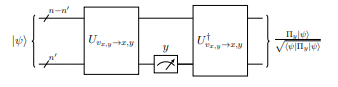

## Medición de Paridad
Un ejemplo concreto de una medición proyectiva balanceada es la medicion de aridad, en la que se busca distinguir entre dos subespacios ortogonales del espacio de Hilbert de dos qubits. En este caso, los subespacios corresponden a los estados con **paridad par** y **paridad impar** .

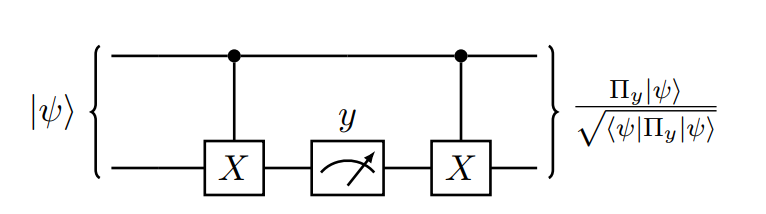

La implementación sigue la arquitectura general de la figura anterior, en la que:

1. Se aplica una transformación unitaria de cambio de base que mapea la base ortonormal de la medición proyectiva a la base computacional.
2. Se realiza una medición parcial en algunos qubits.
3. Se aplica una transformación inversa opcional para recuperar el estado post-medición.

En el caso específico de la medición de paridad sobre dos qubits, definimos  dos proyectores ortogonales $\Pi_0$ y $\Pi_1$ de rango 2, correspondientes a paridad par e impar respectivamente en donde los vectores base de esta medición son:

  $$
  \begin{align*}
  |v_{00}⟩ &= |00⟩, & |v_{10}⟩ &= |11⟩ \\
  |v_{01}⟩ &= |01⟩, & |v_{11}⟩ &= |10⟩
  \end{align*}
  $$


Sea el estado de entrada una superposición general de dos qubits:

$$
|\psi⟩ = \alpha_{00}|00⟩ + \alpha_{01}|01⟩ + \alpha_{10}|10⟩ + \alpha_{11}|11⟩
$$

Tras aplicar la compuerta CNOT, el estado se convierte en:

$$
CNOT \, |\psi⟩ = \alpha_{00}|00⟩ + \alpha_{01}|01⟩ + \alpha_{10}|11⟩ + \alpha_{11}|10⟩
$$

En este nuevo estado, el segundo qubit indica la paridad, si el segundo qubit es 0, los términos $|00⟩$ y $|11⟩$ tienen paridad **par**., si el segundo qubit es 1, los términos $|01⟩$ y $|10⟩$ tienen paridad **impar**.

Al medir el segundo qubit:

* La probabilidad de obtener **paridad 0** es:

  $$
  P(y=0) = |\alpha_{00}|^2 + |\alpha_{11}|^2
  $$

  y el estado post-medición es proporcional a:

  $$
  \alpha_{00}|00⟩ + \alpha_{11}|10⟩
  $$

  que, tras una segunda CNOT, se convierte en:

  $$
  \alpha_{00}|00⟩ + \alpha_{11}|11⟩
  $$

  que coincide con el estado proyectado según $\Pi_0$.

* Análogamente, si el resultado es **paridad 1**, se obtiene el estado proyectado por $\Pi_1$, con probabilidad:

  $$
  P(y=1) = |\alpha_{01}|^2 + |\alpha_{10}|^2
  $$

  y post-medición:

  $$
  \alpha_{01}|01⟩ + \alpha_{10}|11⟩ \xrightarrow{\text{CNOT}} \alpha_{01}|01⟩ + \alpha_{10}|10⟩
  $$




# Ejemplo
Supongamos que el estado inicial de dos qubits es el siguiente:

$$
|\psi⟩ = \frac{1}{2}|00⟩ + \frac{1}{2}|01⟩ + \frac{1}{2}|10⟩ + \frac{1}{2}|11⟩
$$

Verifiquemos que está normalizado:

$$
\left( \frac{1}{2} \right)^2 + \left( \frac{1}{2} \right)^2 + \left( \frac{1}{2} \right)^2 + \left( \frac{1}{2} \right)^2 = 4 \cdot \frac{1}{4} = 1
$$

Aplicamos una compuerta CNOT con el primer qubit como control y el segundo como objetivo.

$$
CNOT\, |\psi⟩ = \frac{1}{2}|00⟩ + \frac{1}{2}|01⟩ + \frac{1}{2}|11⟩ + \frac{1}{2}|10⟩
$$

Reordenamos:

$$
|\psi'⟩ = \frac{1}{2}|00⟩ + \frac{1}{2}|10⟩ + \frac{1}{2}|01⟩ + \frac{1}{2}|11⟩
$$

Ahora medimos **solo el segundo qubit** (el qubit objetivo). Este qubit contiene la **paridad**:


$$
P(y = 0) = |\tfrac{1}{2}|^2 + |\tfrac{1}{2}|^2 = \tfrac{1}{4} + \tfrac{1}{4} = \tfrac{1}{2}
$$


$$
P(y = 1) = |\tfrac{1}{2}|^2 + |\tfrac{1}{2}|^2 = \tfrac{1}{4} + \tfrac{1}{4} = \tfrac{1}{2}
$$

En los estados post-medición si el resultado es $y = 0$ el estado esta  colapsado :

$$
|\psi_0⟩ = \frac{1}{2}|00⟩ + \frac{1}{2}|10⟩
$$

Normalizamos:

$$
||\psi_0||^2 = \left( \frac{1}{2} \right)^2 + \left( \frac{1}{2} \right)^2 = \frac{1}{2} \Rightarrow
|\psi_0⟩ = \frac{1}{\sqrt{2}}(|00⟩ + |10⟩)
$$

Si el resultado es $y = 1$ el estado colapsado:

$$
|\psi_1⟩ = \frac{1}{2}|01⟩ + \frac{1}{2}|11⟩
$$

Normalizamos:

$$
||\psi_1||^2 = \left( \frac{1}{2} \right)^2 + \left( \frac{1}{2} \right)^2 = \frac{1}{2} \Rightarrow
|\psi_1⟩ = \frac{1}{\sqrt{2}}(|01⟩ + |11⟩)
$$

Si queremos volver al estado proyectado original en la base de paridad , aplicamos nuevamente la compuerta CNOT. Esto invierte la transformación y nos deja en el estado:

* Para $y = 0$:

  $$
  \frac{1}{\sqrt{2}}(|00⟩ + |11⟩)
  $$

* Para $y = 1$:

  $$
  \frac{1}{\sqrt{2}}(|01⟩ + |10⟩)
  $$




In [31]:
qc = QuantumCircuit(2, 2)
qc.h([0,1])

state_vector = Statevector.from_instruction(qc)
state_vector.draw('latex')          #tenemos el estado inicial

<IPython.core.display.Latex object>

In [41]:
#imlemnetamos e circuito de la figura

qc.cx(0,1)
qc.measure(1,0)



In [42]:
#simulacion
simulator = AerSimulator()
compiled  = transpile(qc, simulator)
job       = simulator.run(compiled, shots=8192)
result    = job.result()
counts    = result.get_counts()

### Histograma de la medición de paridad

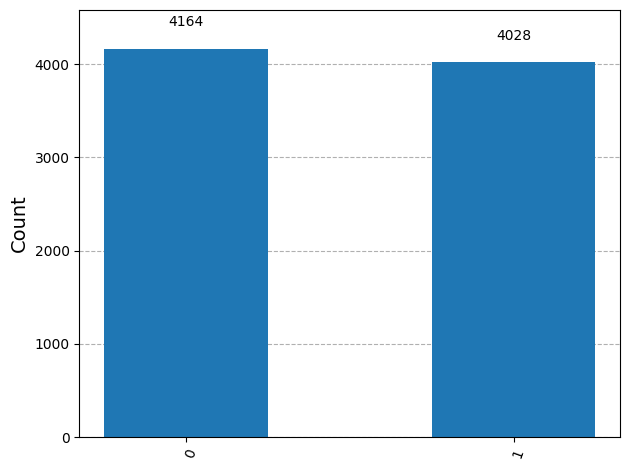

In [43]:
display(Markdown("### Histograma de la medición de paridad"))
plot_histogram(counts)

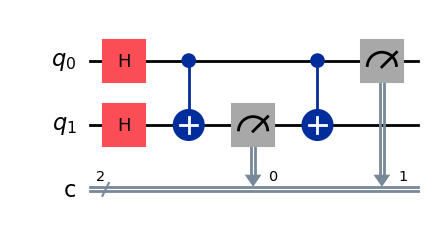

In [52]:
qc1 = QuantumCircuit(2, 2)
qc1.h([0,1])
qc1.cx(0,1)
qc1.measure(1,0)
qc1.cx(0,1)
qc1.measure(0,1)

qc1.draw('mpl')

### Histograma de la recueracion de estado

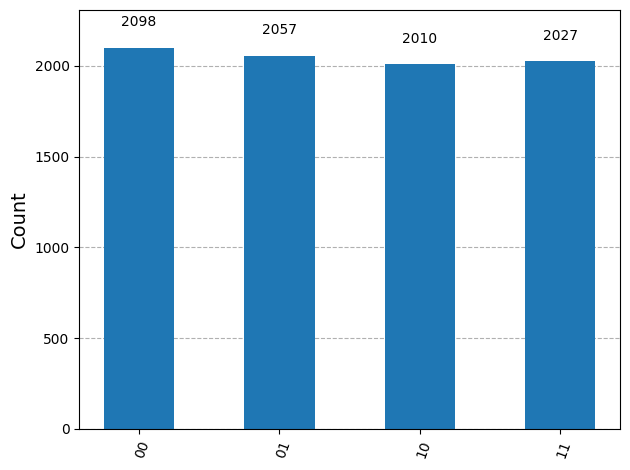

In [53]:
simulator = AerSimulator()
compiled  = transpile(qc1, simulator)
job       = simulator.run(compiled, shots=8192)
result    = job.result()
counts    = result.get_counts()
display(Markdown("### Histograma de la recueracion de estado"))
plot_histogram(counts)

#correccion de errores

La corrección de errores cuánticos busca proteger un qubit frente al ruido de un canal cuántico, como el causado por fallos en hardware o interferencias en una transmisión. A diferencia de la corrección clásica, que usa redundancia mediante copias, en el caso cuántico no es posible duplicar un estado arbitrario debido al teorema de no clonación.

##Bit-Flip Channel

El canal de inversión de bit es un modelo simple de ruido cuántico que permite ilustrar los principios básicos de la corrección de errores cuánticos. En este modelo, se asume que se transmite un sistema de tres qubits, y que como máximo uno de ellos puede sufrir un error de tipo "bit flip", es decir, una inversión de su estado lógico de |0⟩ a |1⟩ .

El estado de entrada general se expresa como una superposición coherente de todos los estados base de tres qubits:

$$
|\psi_{\text{in}}\rangle = \sum_{x=0}^{1} \sum_{y=0}^{1} \sum_{z=0}^{1} \alpha_{x,y,z} |x, y, z\rangle
$$

Tras la acción del canal, el estado de salida puede ser:

* **Sin error**: el estado se conserva tal como está.
* **Error en el primer qubit**: se aplica la compuerta $X$ al primer qubit.
* **Error en el segundo qubit**: se aplica $X$ al segundo qubit.
* **Error en el tercer qubit**: se aplica $X$ al tercer qubit.

Aquí tienes la **traducción académica en prosa** del fragmento solicitado:



### Codificación cuántica

Supongamos que tenemos un qubit en un estado desconocido $|\psi\rangle = \alpha_0|0\rangle + \alpha_1|1\rangle$, y queremos protegerlo t contra el **canal de inversión de bit**, queremos codificar este qubit de manera que los errores introducidos por el canal puedan ser corregidos.

Sabemos que no podemos clonar el estado, pero podemos utilizar lo que se conoce como **“clonación clásica”** *, un procedimiento descrito que se muestra en la figura.

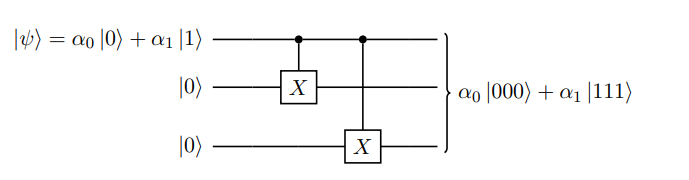

el estado codificado que se obtiene es:

$$
\alpha_0 |000\rangle + \alpha_1 |111\rangle \quad
$$

Con este circuito de codificación, el canal puede producir una de las siguientes salidas posibles, dependiendo de si ocurre o no una inversión de bit en alguno de los tres qubits:

* **Sin error**:

  $$
  |\psi_{\text{out}}\rangle = \alpha_0 |000\rangle + \alpha_1 |111\rangle
  $$

* **Si el primer qubit se invierte**:

  $$
  |\psi_{\text{out}}\rangle = \alpha_0 |100\rangle + \alpha_1 |011\rangle
  $$

* **Si el segundo qubit se invierte**:

  $$
  |\psi_{\text{out}}\rangle = \alpha_0 |010\rangle + \alpha_1 |101\rangle
  $$

* **Si el tercer qubit se invierte**:

  $$
  |\psi_{\text{out}}\rangle = \alpha_0 |001\rangle + \alpha_1 |110\rangle
  $$

Este es un ejemplo básico de **codificación cuántica** orientada a la **corrección de errores de tipo bit flip**, donde el estado original puede ser recuperado mediante un proceso de detección y corrección basado en mediciones proyectivas.


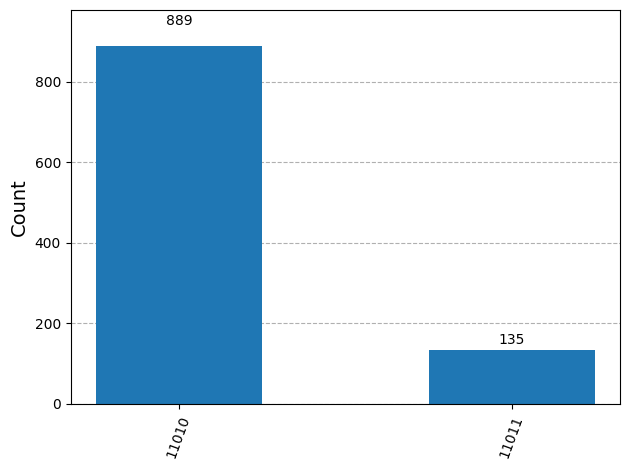

In [58]:
qc = QuantumCircuit(5, 5)


qc.ry(0.7, 0)
qc.cx(0, 1)
qc.cx(0, 2)


qc.x(1)


qc.cx(0, 3); qc.cx(1, 3)
qc.cx(1, 4); qc.cx(2, 4)
qc.measure(3, 3)
qc.measure(4, 4)


qc.cx(0, 1)
qc.cx(0, 2)


qc.measure([0, 1, 2], [0, 1, 2])

sim = AerSimulator()
result = sim.run(transpile(qc, sim), shots=1024).result()
plot_histogram(result.get_counts())



## Decodificación cuántica mediante una medición proyectiva

De acuerdo con lo expuesto anteriormen, si **no ocurre ningún error**, el estado codificado se mantiene dentro del subespacio bidimensional generado por los vectores $|000\rangle$ y $|111\rangle$. El proyector sobre este subespacio es

$$
\Pi_{00} = |000\rangle\langle 000| \;+\; |111\rangle\langle 111|.
$$

Si el primer qubit se invierte, el estado resultante esta en el subespacio bidimensional generado por $|100\rangle$ y $|011\rangle$, con proyector

$$
\Pi_{10} = |100\rangle\langle 100| \;+\; |011\rangle\langle 011|.
$$

De forma análoga para una inversión en el **segundo qubit**, el estado pertenece al subespacio generado por $|010\rangle$ y $|101\rangle$, cuyo proyector es

  $$
  \Pi_{11} = |010\rangle\langle 010| \;+\; |101\rangle\langle 101|.
  $$

Para una inversión en el **tercer qubit**, el estado cae en el subespacio generado por $|001\rangle$ y $|110\rangle$, con proyector

  $$
  \Pi_{01} = |001\rangle\langle 001| \;+\; |110\rangle\langle 110|.
  $$

### Corrección mediante la medición proyectiva

Aplicar esta colección de proyectores al estado de salida $|\psi_{\text{out}}\rangle$ del canal permite **identificar y corregir** un único bit‑flip:

* Salida $y = 00$ → no se aplica ninguna operación.
* Salida $y = 10$ → aplicar una compuerta NOT (Pauli‑X) al **primer qubit**.
* Salida $y = 11$ → aplicar $X$ al **segundo qubit**.
* Salida $y = 01$ → aplicar $X$ al **tercer qubit**.

La eficacia de este procedimiento depende críticamente de que se trate de una medición proyectiva. Con una medición completa, el sistema colapsaría destruyendo la superposición codificada $\alpha_0|000\rangle + \alpha_1|111\rangle$ y, por ende, la información del qubit original. En cambio, la medición proyectiva preserva intacto el estado dentro de cada subespacio.


##  Principios fundamentales de la corrección de errores cuánticos

En términos generales, la corrección de errores cuánticos protege un estado **desconocido** de $k$ qubits  codificándolo en un registro de $n$ qubits. El estado original, que vive en un espacio de dimensión $2^{k}$, pasa a ocupar un **subespacio** de igual dimensión dentro del espacio total de dimensión $2^{n}$.

La **codificación** se diseña de modo que cada tipo de error posible desplace el estado a un **subespacio ortogonal** diferente, también de dimensión $2^{k}$. Una medición proyectiva cuyos proyectores correspondan a esos subespacios puede entonces **distinguir los errores sin perturbar** el estado dentro de cada subespacio.

Si existen $m$ errores distinguibles, el número de qubits codificados debe satisfacer

$$
2^{\,n} \;\ge\; 2^{\,k}\, (m + 1).
$$

El lado derecho refleja la necesidad de disponer de $m + 1$ subespacios ortogonales, cada uno de dimensión $2^{k}$.

En el caso:

$$
k = 1,\quad n = 3,\quad m = 3 \;\;\Rightarrow\;\; 2^{3} = 2^{1}(1 + 3) = 8,
$$

Como una alternativa menos poderosa a la corrección cuántica de errores, también es posible diseñar esquemas de detección cuántica de errores, mediante los cuales los errores solo se detectan, pero no se corrigen. Con la detección de errores, se puede determinar la presencia de un error, sin necesidad de identificar ni corregir el error específico


# Mediciones Completas con Qubits Ancilla

Se puede implementar una medición de von Neumann usando qubits ancilla en cualquier base ortonormal $\{ |v_0\rangle, |v_1\rangle, \ldots, |v_{N-1}\rangle \}$ para un sistema de $n$ qubits  mediante el circuito mostrado

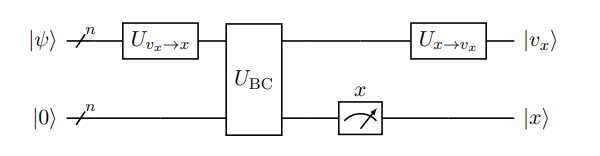

Vemos que primero se aplica la unidad unitaria $U_{v_x \rightarrow x}$ a los qubits del sistema, como en la Esta unidad transforma cada vector de la base de medición $|v_x\rangle$ en el correspondiente vector de la base computacional $|x\rangle$ .Aquí no se mide directamente el primer conjunto de qubits.En su lugar, estos qubits son “copiados” a los ancillas mediante un circuito de copia de base, es decir, se transfieren a los qubits ancilla.
Luego se miden los qubits ancilla y finalmente, se aplica la transformación inversa $U_{x \rightarrow v_x}$ a los qubits del sistema original.

La transformación de copia de base $U_{BC}$ se define como:

$$
U_{BC} = \sum_{x=0}^{N-1} \sum_{y=0}^{N-1} |x, x \oplus y\rangle \langle x, y| \tag{5.58}
$$

donde $|y\rangle$ representa los vectores de la base computacional de los qubits ancilla.
Ahora supongamos un estado arbitrario puro:

$$
|\psi\rangle = \sum_{x=0}^{N-1} \alpha_x |v_x\rangle
$$

Luego de aplicar $U_{v_x \rightarrow x}$, el estado global se convierte en:

$$
\sum_{x=0}^{N-1} \alpha_x |x\rangle \otimes |0\rangle
$$

Después de aplicar $U_{BC}$:

$$
U_{BC}(U_{v_x \rightarrow x} \otimes I) \left( \sum_x \alpha_x |v_x\rangle \otimes |0\rangle \right) = \sum_x \alpha_x |x\rangle \otimes |x\rangle \tag{5.59}
$$

Luego, al medir los ancillas se obtiene el resultado $x$ con probabilidad $|\alpha_x|^2$, y el estado post-medición es $|x\rangle \otimes |x\rangle$.
Finalmente, al aplicar $U_{x \rightarrow v_x}$ se recupera $|v_x\rangle \otimes |x\rangle$.


